# Housing Days On Market Exploratory Analysis and Visualization

## Information
Using the output file of Data Preparation for analysis and modeling notebook ‘df_data_inspection_cleaning_output.csv’ which has 13,725 instances and 107features, this note book does exploratory analysis and visualization. 

We have substantially reduced our features to 44 which are of interest to our analysis and performed some computation analysis using summary statistics and histograms. 

Contrary to our initial hypothesis, the correlation matrix and correlation heat map showed that all of the features included in the analysis have no relationship with days on market. However, we noticed high correlation of some of our features with list price, close date month year and median home value per square feet.
owever, we noticed high correlation of some of our features with list price, close date month year and median home value per square feet. 


### Environment Information:

Python: 2.7

#### Contributed by: Sabel Kassa

## Python Package(s) Used

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import time
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates, radviz, lag_plot, bootstrap_plot
from scipy.stats import probplot, skew, skewtest, kurtosis, kurtosistest, ppcc_plot, ppcc_max
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline
plt.style.use('seaborn-whitegrid')

from bokeh.charts import BoxPlot, output_file, show
from bokeh.charts import Histogram, output_file, show
from bokeh.plotting import figure
from bokeh.layouts import row
from bokeh.io import push_notebook,show , output_notebook
from bokeh.sampledata.autompg import autompg as df
from bokeh.charts import defaults, vplot, hplot, show, output_file
from bokeh.charts import TimeSeries, output_file, show


### Fetching data

Fetching data set from DOM-(Data preparation for analysis and modeling)notebook.

In [3]:
# Import data csv into dataframe
df_4 = pd.read_csv('df_data_inspection_cleaning_output.csv')

df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Columns: 107 entries, ID to ListPrice2_delta
dtypes: float64(43), int64(64)
memory usage: 11.2 MB


## Reducing features for analysis  

In [4]:
#df_4 = df_4.drop('Unnamed: 0', axis = 1)

In [5]:
#Reduced features for analysis and modeling 

Column_list =[
'ListPrice2',
'ClosePrice2',
'Bedrooms',
'BathsFull',
'BathsHalf',
'BasementY/N',
'DOMP',
'TaxTotalLivingArea',
'Zip',
'SaleCount',
'MedianValuePerSqft',
'PctOfHomesDecreasingInValues',
'PctOfHomesIncreasingInValues',
'Turnover',
'PriceIndex',
'FreddieMac15yr',
'FreddieMac5yrARM',
'mimi',
'mimiStatus',
'PropertyCrimes',
'ViolentCrimes',
'Pct16andOverEmployed_2010_14',
'AvgFamilyIncAdj_2010_14',
'PctFamiliesOwnChildrenFH_2010_14',
'PctUnemployed_2010_14',
'PctVacantHsgUnitsForRent_2010_14',
'MS_SDStarRating',
'HS_SDStarRating',
'ES_SDStarRating',
'count_grocery_km',
'count_metro_bus_km',
'count_metro_station_km',
'count_public_school_elem_km',
'count_public_school_high_km',
'count_public_school_mid_km',
'distance_grocery_km',
'distance_metro_bus_km',
'distance_metro_station_km',
'distance_public_school_elem_km',
'distance_public_school_high_km',
'distance_public_school_mid_km',
'CloseDate_dt_year',
'CloseDate_dt_month',
'ListDate_dt_year',
'ListDate_dt_month']

df_5=df_4[Column_list]
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 45 columns):
ListPrice2                          13725 non-null int64
ClosePrice2                         13725 non-null int64
Bedrooms                            13725 non-null int64
BathsFull                           13725 non-null int64
BathsHalf                           13725 non-null int64
BasementY/N                         13725 non-null int64
DOMP                                13725 non-null int64
TaxTotalLivingArea                  13725 non-null int64
Zip                                 13725 non-null int64
SaleCount                           13725 non-null int64
MedianValuePerSqft                  13725 non-null int64
PctOfHomesDecreasingInValues        13725 non-null float64
PctOfHomesIncreasingInValues        13725 non-null float64
Turnover                            13725 non-null float64
PriceIndex                          13725 non-null float64
FreddieMac15yr              

## Exploratory analysis 

### Summary Statistics of compiled dataset

From the summary statistics below, we can observe high competitive housing market with value of properties in DC is roughly ranges from $300,000 to a maximum of $788,000 with median begin around $600,000. The margin between list price and close price is significantly low showing a very competitive real estate market. In addition, the days on market is also very low with an average of 46 days to 75%of the houses being sold in about 56 days. 

The area of living is relatively small with about 50% of the properties occupying less than 1000 square feet. Public school ranking is also relatively very low with about 50% of the properties being assigned to public schools with ranking of 3 and 2 based on school digger ranking of less than 70% in school rank. 

Majority of the properties in DC have increased in value and the average income of more than 50% families is above 145,000. The percentage of vacant housing units in the market for rent is also relatively very low depicting a robust market and relatively stable demographics. 


In [6]:
# Summary Statistics 
Summry_Statistics=pd.DataFrame(df_5.describe())
Summry_Statistics
#Summry_Statistics.to_csv('Summary_Stat2.csv')

,ListPrice2,ClosePrice2,Bedrooms,BathsFull,BathsHalf,BasementY/N,DOMP,TaxTotalLivingArea,Zip,SaleCount,...,distance_grocery_km,distance_metro_bus_km,distance_metro_station_km,distance_public_school_elem_km,distance_public_school_high_km,distance_public_school_mid_km,CloseDate_dt_year,CloseDate_dt_month,ListDate_dt_year,ListDate_dt_month
count,1.372500e+04,1.372500e+04,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,...,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000,13725.000000
mean,6.343952e+05,6.227699e+05,2.767650,1.973115,0.480000,0.543825,51.855082,1466.342004,20013.029071,1.231694,...,0.846935,0.136927,1.057729,0.609631,1.849963,1.376025,2012.302951,6.840729,2012.180546,6.674098
std,6.706850e+05,6.278060e+05,1.431167,1.033435,0.601281,0.498094,84.241788,948.516372,7.969701,0.470278,...,0.609162,0.105902,0.684123,0.336956,1.052912,0.808438,1.365305,3.191040,1.402173,3.127608
min,1.490000e+04,1.600000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,247.000000,20001.000000,1.000000,...,0.016042,0.007285,0.019756,0.035676,0.062464,0.052788,2010.000000,1.000000,2010.000000,1.000000
25%,2.890000e+05,2.814000e+05,2.000000,1.000000,0.000000,0.000000,6.000000,868.000000,20008.000000,1.000000,...,0.387741,0.069759,0.529902,0.349549,1.020411,0.809928,2011.000000,4.000000,2011.000000,4.000000
50%,4.650000e+05,4.600000e+05,3.000000,2.000000,0.000000,1.000000,19.000000,1277.000000,20011.000000,1.000000,...,0.694759,0.109311,0.876670,0.542982,1.611774,1.268460,2012.000000,7.000000,2012.000000,7.000000
75%,7.800000e+05,7.785000e+05,4.000000,3.000000,1.000000,1.000000,63.000000,1752.000000,20017.000000,1.000000,...,1.124458,0.173550,1.487089,0.804739,2.610773,1.759276,2014.000000,10.000000,2013.000000,9.000000
max,2.590000e+07,2.200000e+07,12.000000,11.000000,11.000000,1.000000,1307.000000,42242.000000,20037.000000,5.000000,...,3.531158,1.078976,3.414045,1.953591,5.193752,5.523279,2014.000000,12.000000,2014.000000,12.000000


### Analyzing Distribution of Features

In [7]:
#Plotting distribution certain features using Bokeh. 
defaults.width = 450
defaults.height = 350

DOMP_Hist= Histogram(df_5, values= 'DOMP',color ='navy', title="Days on Market Distribution")
ListPrice_Hist=Histogram(df_5,values='ListPrice2',color='red',title="List Price Distribution")
ClosePrice_Hist=Histogram(df_5,values='ClosePrice2',color='indigo',title="Close Price Distribution")
Medval_Hist=Histogram(df_5,values='MedianValuePerSqft',color='green',title="Median Value per Square feet Distribution")
HomeDecr_Hist=Histogram(df_5,values='PctOfHomesDecreasingInValues',color='turquoise',title="%Properties decreasing in value Distribution")
HomeIncr_Hist=Histogram(df_5,values='PctOfHomesIncreasingInValues',color='orange',title='%Properties increasing in value Distribution')
FamilyInc_Hist=Histogram(df_5,values='AvgFamilyIncAdj_2010_14',color='fuchsia',title="Average family income distribution")

output_notebook()

d= hplot(DOMP_Hist)
p = hplot(ListPrice_Hist,ClosePrice_Hist)
m= hplot(HomeDecr_Hist,HomeIncr_Hist)
v=hplot(Medval_Hist,FamilyInc_Hist)

show(vplot(d,p,m,v))



Loading BokehJS ...

C:\Users\Sabelgk\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: BokehDeprecationWarning:

bokeh.io.hplot was deprecated in Bokeh 0.12.0; please use bokeh.models.layouts.Row instead

C:\Users\Sabelgk\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: BokehDeprecationWarning:

bokeh.io.hplot was deprecated in Bokeh 0.12.0; please use bokeh.models.layouts.Row instead

C:\Users\Sabelgk\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: BokehDeprecationWarning:

bokeh.io.hplot was deprecated in Bokeh 0.12.0; please use bokeh.models.layouts.Row instead

C:\Users\Sabelgk\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: BokehDeprecationWarning:

bokeh.io.hplot was deprecated in Bokeh 0.12.0; please use bokeh.models.layouts.Row instead

C:\Users\Sabelgk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: BokehDeprecationWarning:

bokeh.io.vplot was deprecated in Bokeh 0.12.0; please use bokeh.models.layouts.Column instead



In [7]:
from bokeh.charts import Horizon, output_file, show

# read in some stock data from the Yahoo Finance API

#hp = Horizon(df_5, x='ListDate_dt_Year',y='DOMP', plot_width=800, plot_height=300,title="Days on market trend")

#output_file("DOMPTrend.html")

#show(hp)
from bokeh.charts import Scatter, output_file, show

scatter = Scatter(df_5, x='ListDate_dt_Year', y='DOMP', color='cyl', marker='origin',
                  title="Auto MPG", xlabel="Miles Per Gallon",
                  ylabel="Horsepower")

output_file('scatter.png')
show(scatter)

KeyError: 'ListDate_dt_Year'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000883726EBE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000008837D657F0>]], dtype=object)

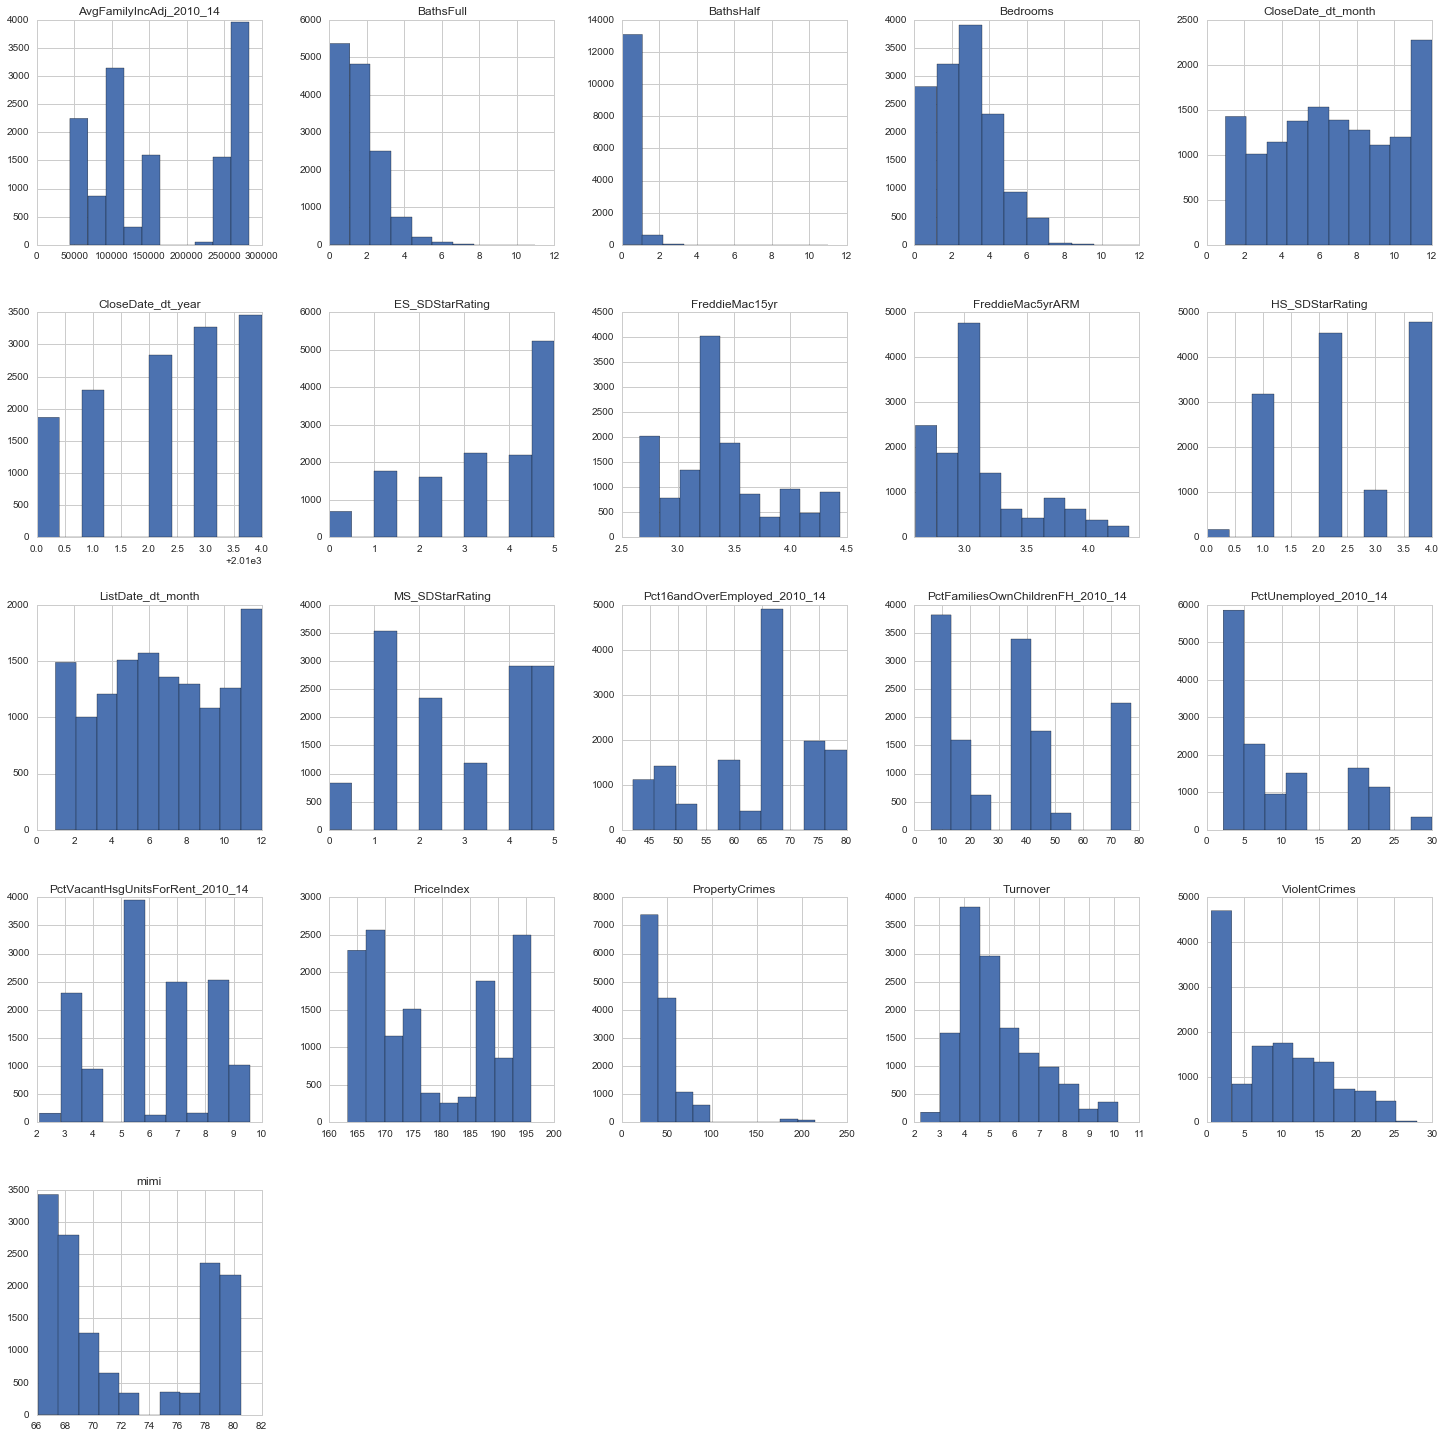

In [8]:
#Histogram of remaining features 

Column_list =[
'Bedrooms',
'BathsFull',
'BathsHalf',
'Turnover',
'PriceIndex',
'FreddieMac15yr',
'FreddieMac5yrARM',
'mimi',
'PropertyCrimes',
'ViolentCrimes',
'Pct16andOverEmployed_2010_14',
'AvgFamilyIncAdj_2010_14',
'PctFamiliesOwnChildrenFH_2010_14',
'PctUnemployed_2010_14',
'PctVacantHsgUnitsForRent_2010_14',
'MS_SDStarRating',
'HS_SDStarRating',
'ES_SDStarRating',
'CloseDate_dt_year',
'CloseDate_dt_month',
'ListDate_dt_month']
df_5a=df_4[Column_list]
df_5a.hist(figsize=(25,25))



## Correlation of all features 

In [9]:
#Correlation Matrix 
df_5_CorrelationMatrix = pd.DataFrame(df_5.corr())
df_5_CorrelationMatrix
#df_5_CorrelationMatrix.to_csv('Correlation_Matrix.csv')

,ListPrice2,ClosePrice2,Bedrooms,BathsFull,BathsHalf,BasementY/N,DOMP,TaxTotalLivingArea,Zip,SaleCount,...,distance_grocery_km,distance_metro_bus_km,distance_metro_station_km,distance_public_school_elem_km,distance_public_school_high_km,distance_public_school_mid_km,CloseDate_dt_year,CloseDate_dt_month,ListDate_dt_year,ListDate_dt_month
ListPrice2,1.000000,0.996453,0.485540,0.634870,0.379730,0.219961,0.072187,0.705299,-0.163523,-0.050282,...,-0.100069,0.207301,0.139182,0.077384,0.216066,0.064712,0.034244,0.017860,0.021333,0.015923
ClosePrice2,0.996453,1.000000,0.496237,0.645378,0.385940,0.228612,0.054574,0.710853,-0.172166,-0.052894,...,-0.108201,0.212587,0.139719,0.078586,0.214171,0.066664,0.045482,0.018051,0.035094,0.016426
Bedrooms,0.485540,0.496237,1.000000,0.751070,0.460604,0.666166,0.027779,0.707527,-0.015724,0.026294,...,0.261996,0.236977,0.270387,-0.002739,0.104925,0.161937,-0.101464,-0.006030,-0.106470,0.009193
BathsFull,0.634870,0.645378,0.751070,1.000000,0.336088,0.460856,0.053977,0.716969,-0.080598,-0.004124,...,0.122045,0.241993,0.238723,0.043741,0.138228,0.165611,-0.042151,-0.005541,-0.052415,0.005202
BathsHalf,0.379730,0.385940,0.460604,0.336088,1.000000,0.387635,0.057837,0.460488,-0.009937,-0.003195,...,0.139988,0.176696,0.207901,0.035453,0.125601,0.153124,-0.061762,-0.005648,-0.070475,-0.000076
BasementY/N,0.219961,0.228612,0.666166,0.460856,0.387635,1.000000,0.003203,0.418923,0.060463,0.082942,...,0.346164,0.206972,0.295126,0.017266,0.137553,0.172417,-0.149494,-0.001980,-0.150192,0.020418
DOMP,0.072187,0.054574,0.027779,0.053977,0.057837,0.003203,1.000000,0.087486,0.084203,-0.007545,...,0.119686,0.021916,0.079844,0.022682,0.073336,0.032913,-0.088175,-0.028630,-0.253255,-0.011140
TaxTotalLivingArea,0.705299,0.710853,0.707527,0.716969,0.460488,0.418923,0.087486,1.000000,-0.060387,-0.015626,...,0.120438,0.262348,0.243859,0.049057,0.157054,0.181009,-0.064908,-0.007305,-0.077920,-0.007223
Zip,-0.163523,-0.172166,-0.015724,-0.080598,-0.009937,0.060463,0.084203,-0.060387,1.000000,0.061853,...,0.338206,-0.007686,0.033539,0.071542,0.131086,0.017191,-0.126697,-0.003187,-0.137086,-0.002689
SaleCount,-0.050282,-0.052894,0.026294,-0.004124,-0.003195,0.082942,-0.007545,-0.015626,0.061853,1.000000,...,0.096815,-0.016397,0.033954,-0.034675,-0.003980,0.045552,-0.074603,-0.019738,-0.073277,-0.010088


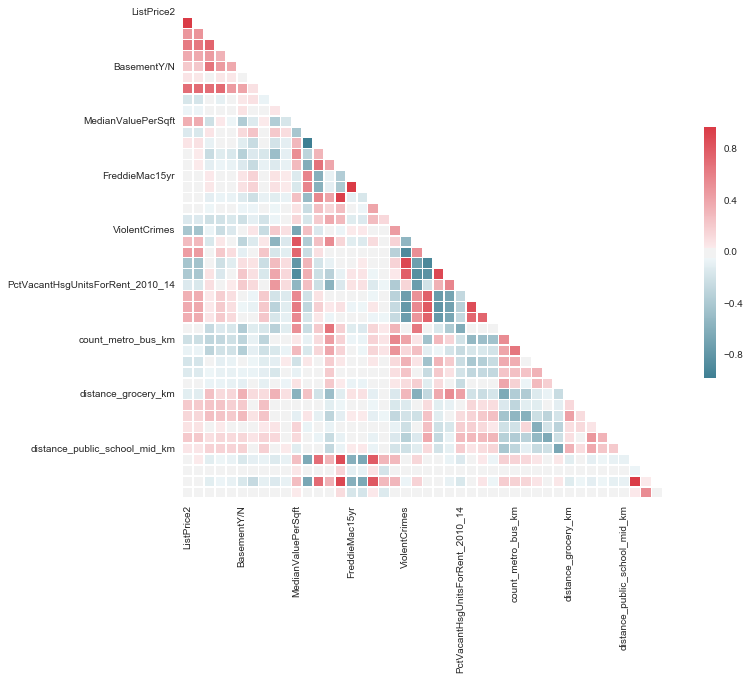

In [14]:
#Create Correlation Matrix plot 

# Generate a mask for the upper triangle
mask = np.zeros_like(df_5_CorrelationMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_5_CorrelationMatrix, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Surprisingly, the correlation matrix shows that days on market in DC area doesn’t have any correlation with any of the features used in our analysis. This is quite contrary to our initial hypothesis and the perception of the majority in real estate market. 

However, we have observed some interesting relationship among other features in our analysis. We can see some correlation between values of property and no of bed room and bathroom as well as average family adjusted income. Median value per square feet is highly correlated with percentage of employed population, income, Zillow home value index and no ofPercentage change in home value is also related with price index and proportion of current mortgage payments in each market, and the local employment picture (mimi) and Freddie Mac's DC house price index (PriceIndex) as well as the dates the property was put on market.

The data also shows high correlation between property and violent crimes and public school ranking, which shows the impact of low ranking school in neighborhood peace. There is also a negative relationship between violent crime and Zillow's median estimated home value (Zhvi) which depicts the impact of crime on neighborhood property value. 

There is high correlation between the average family income and the Zillow home value index as well as median value per square feet. And a high negative relationship between family income and public school ranking. 
We have can also see that areas with properties having many children have high crime rate and unemployed but on the contrary they are located in areas where public school ranking is higher. 

There is some correlation between proximity of properties to grocery store and median value per square feet of properties and turnover - percentage of all homes in the home's zip area that sold in the past 12 months from the closing date as well as employment. 
We can also see some positive correlation between accessibility of metro bus and metro stations and property crimes reported in DC. And a negative correlation between median value per square feet of properties and proximity to grocery stores.  Value of property in DC is not related to the proximity of grocery stores. And the Value of property in DC is has low correlation with the proximity to metro stations and schools

The date the property is listed on market is highly correlated with Mimi- (proportion of current mortgage payments in each market, and the local employment picture), Price Index (Freddie Mac's DC house price index) and percentage of homes increasing in value. 


C:\Users\Sabelgk\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



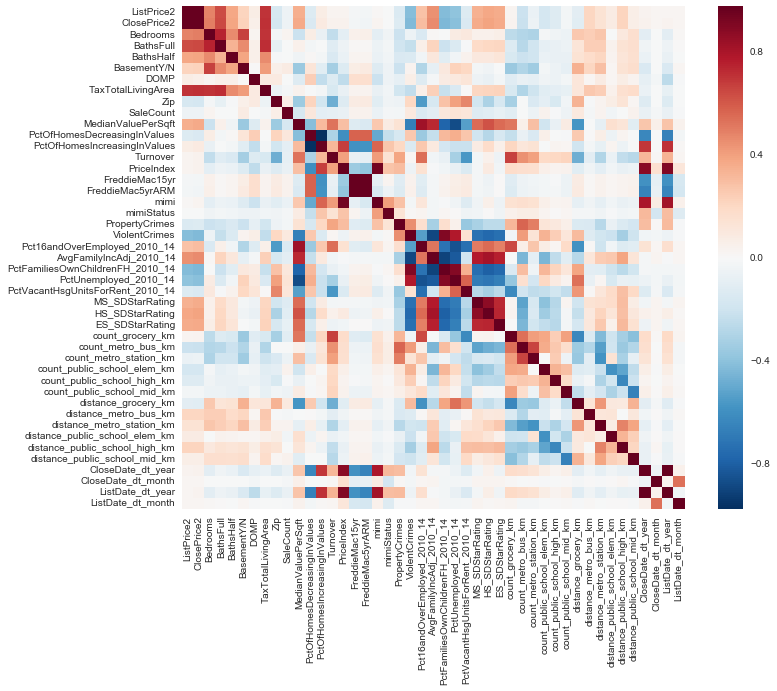

In [15]:
# Correlation heatmap
f, ax = plt.subplots(figsize=(12,9))
heat_map = sns.heatmap(df_5.corr(),vmax =0.8,square=True)
fig = heat_map.get_figure()
fig.savefig('correlation_heatmap_plot')
fig.show()
fig.savefig("Correlation_Heatmap.png")

# Analysis of DC properties by Zip Code

Since we didn't see any relationship between our target variable- days on market and all of the other feautures, we will be further breaking down our properites and features by zipcode. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BDBA37B6A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000BDC68F9C88>]], dtype=object)

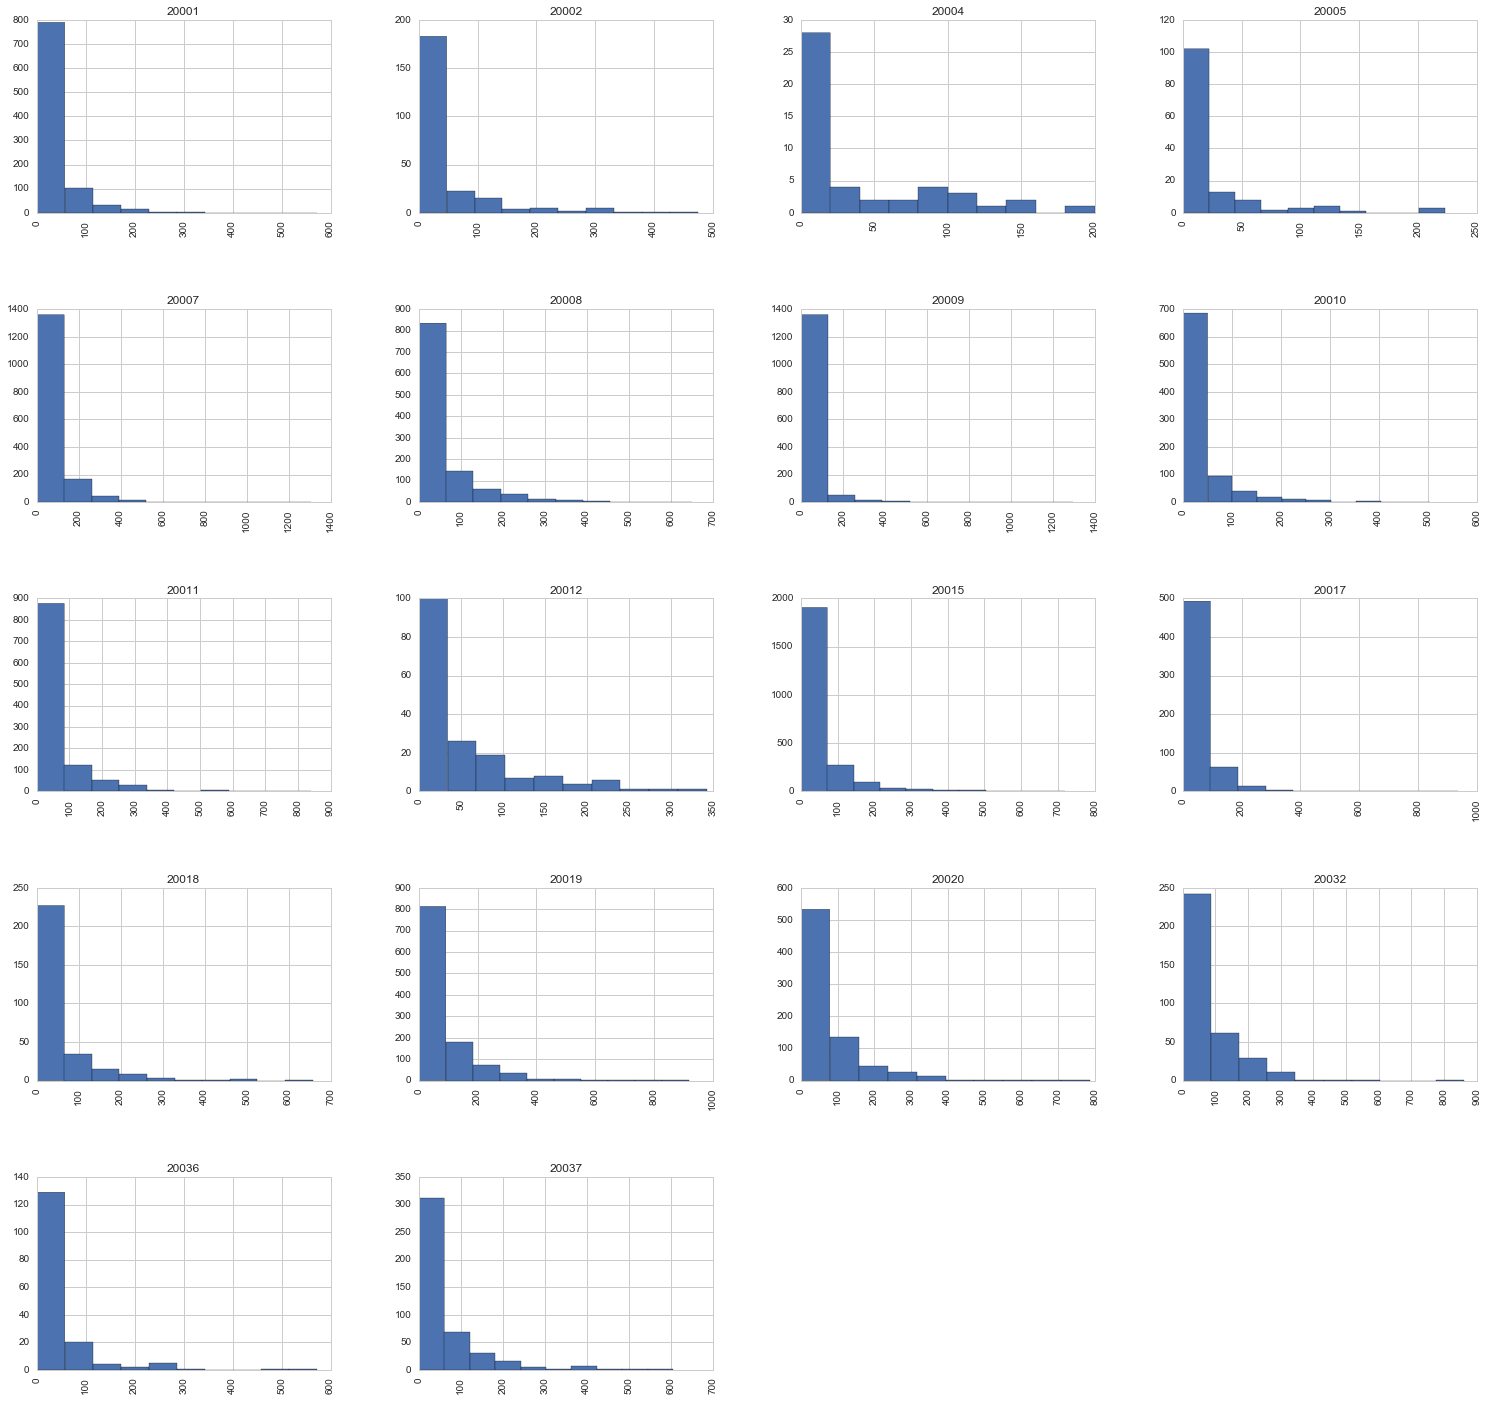

In [16]:
df_5['DOMP'].hist(by=df_5['Zip'],figsize=(25,25))

In [17]:
#Values per zipcode 
groupby_Zip=df_5.groupby(df_5['Zip'])
Zip_Summary_Stat=groupby_Zip.describe()
#df.groupby(df_5['Zip']).to_csv('Zip_Summary.csv')
#Zip_Summary_Stat.to_csv('Zip_summary_stat.csv')
Zip_Summary_Stat



AvgFamilyIncAdj_2010_14  BasementY/N   BathsFull   BathsHalf  \
Zip                                                                         
20001 count                    950.0   950.000000  950.000000  950.000000   
      mean                  108639.0     0.227368    1.590526    0.247368   
      std                        0.0     0.419353    0.800234    0.460069   
      min                   108639.0     0.000000    0.000000    0.000000   
      25%                   108639.0     0.000000    1.000000    0.000000   
      50%                   108639.0     0.000000    1.000000    0.000000   
      75%                   108639.0     0.000000    2.000000    0.000000   
      max                   108639.0     1.000000   11.000000    4.000000   
20002 count                    240.0   240.000000  240.000000  240.000000   
      mean                  106848.0     0.641667    1.775000    0.454167   
      std                        0.0     0.480513    0.807522    0.523489   
      min                   106848.0     0.000000    1.000000    0.000000   
      25%                   106848.0     0.000000    1.000000    0.000000   
      50%                   106848.0     1.000000    2.000000    0.000000   
      75%                   106848.0     1.000000    2.000000    1.000000   
      max                   106848.0     1.000000    5.000000    2.000000   
20004 count                     47.0    47.000000   47.000000   47.000000   
      mean                  223309.0     0.000000    1.170213    0.212766   
      std                        0.0     0.000000    0.433346    0.413688   
      min                   223309.0     0.000000    0.000000    0.000000   
      25%                   223309.0     0.000000    1.000000    0.000000   
      50%                   223309.0     0.000000    1.000000    0.000000   
      75%                   223309.0     0.000000    1.000000    0.000000   
      max                   223309.0     0.000000    2.000000    1.000000   
20005 count                    136.0   136.000000  136.000000  136.000000   
      mean                  133959.0     0.066176    1.558824    0.147059   
      std                        0.0     0.249509    0.841205    0.375735   
      min                   133959.0     0.000000    1.000000    0.000000   
      25%                   133959.0     0.000000    1.000000    0.000000   
      50%                   133959.0     0.000000    1.000000    0.000000   
...                              ...          ...         ...         ...   
20020 std                        0.0     0.475416    0.764917    0.538340   
      min                    51713.0     0.000000    0.000000    0.000000   
      25%                    51713.0     0.000000    1.000000    0.000000   
      50%                    51713.0     1.000000    2.000000    0.000000   
      75%                    51713.0     1.000000    2.000000    1.000000   
      max                    51713.0     1.000000    4.000000    3.000000   
20032 count                    348.0   348.000000  348.000000  348.000000   
      mean                   44289.0     0.652299    1.695402    0.433908   
      std                        0.0     0.476926    0.795725    0.566805   
      min                    44289.0     0.000000    0.000000    0.000000   
      25%                    44289.0     0.000000    1.000000    0.000000   
      50%                    44289.0     1.000000    2.000000    0.000000   
      75%                    44289.0     1.000000    2.000000    1.000000   
      max                    44289.0     1.000000    6.000000    3.000000   
20036 count                    163.0   163.000000  163.000000  163.000000   
      mean                  145350.0     0.067485    1.263804    0.122699   
      std                        0.0     0.251633    0.665074    0.364692   
      min                   145350.0     0.000000    1.000000    0.000000   
      25%                   145350.0     0.000000    1.000000    0.000000   
      50%

## Correlation of features per zipcode 

In [18]:
df_5a_Correlation= df_5.groupby('Zip').corr()
df_5a_Correlation.to_csv('Correlation_Matrix_by_Zipcode.csv')

In [9]:

## Pairplot on selected featureses
#pair_plot = sns.pairplot(df_5a)
#fig = pair_plot.get_figure()
#fig.savefig('pair_plot')
#fig.show

### Average values of features per zipcode 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BDC6B14978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000BDCA30FE48>]], dtype=object)

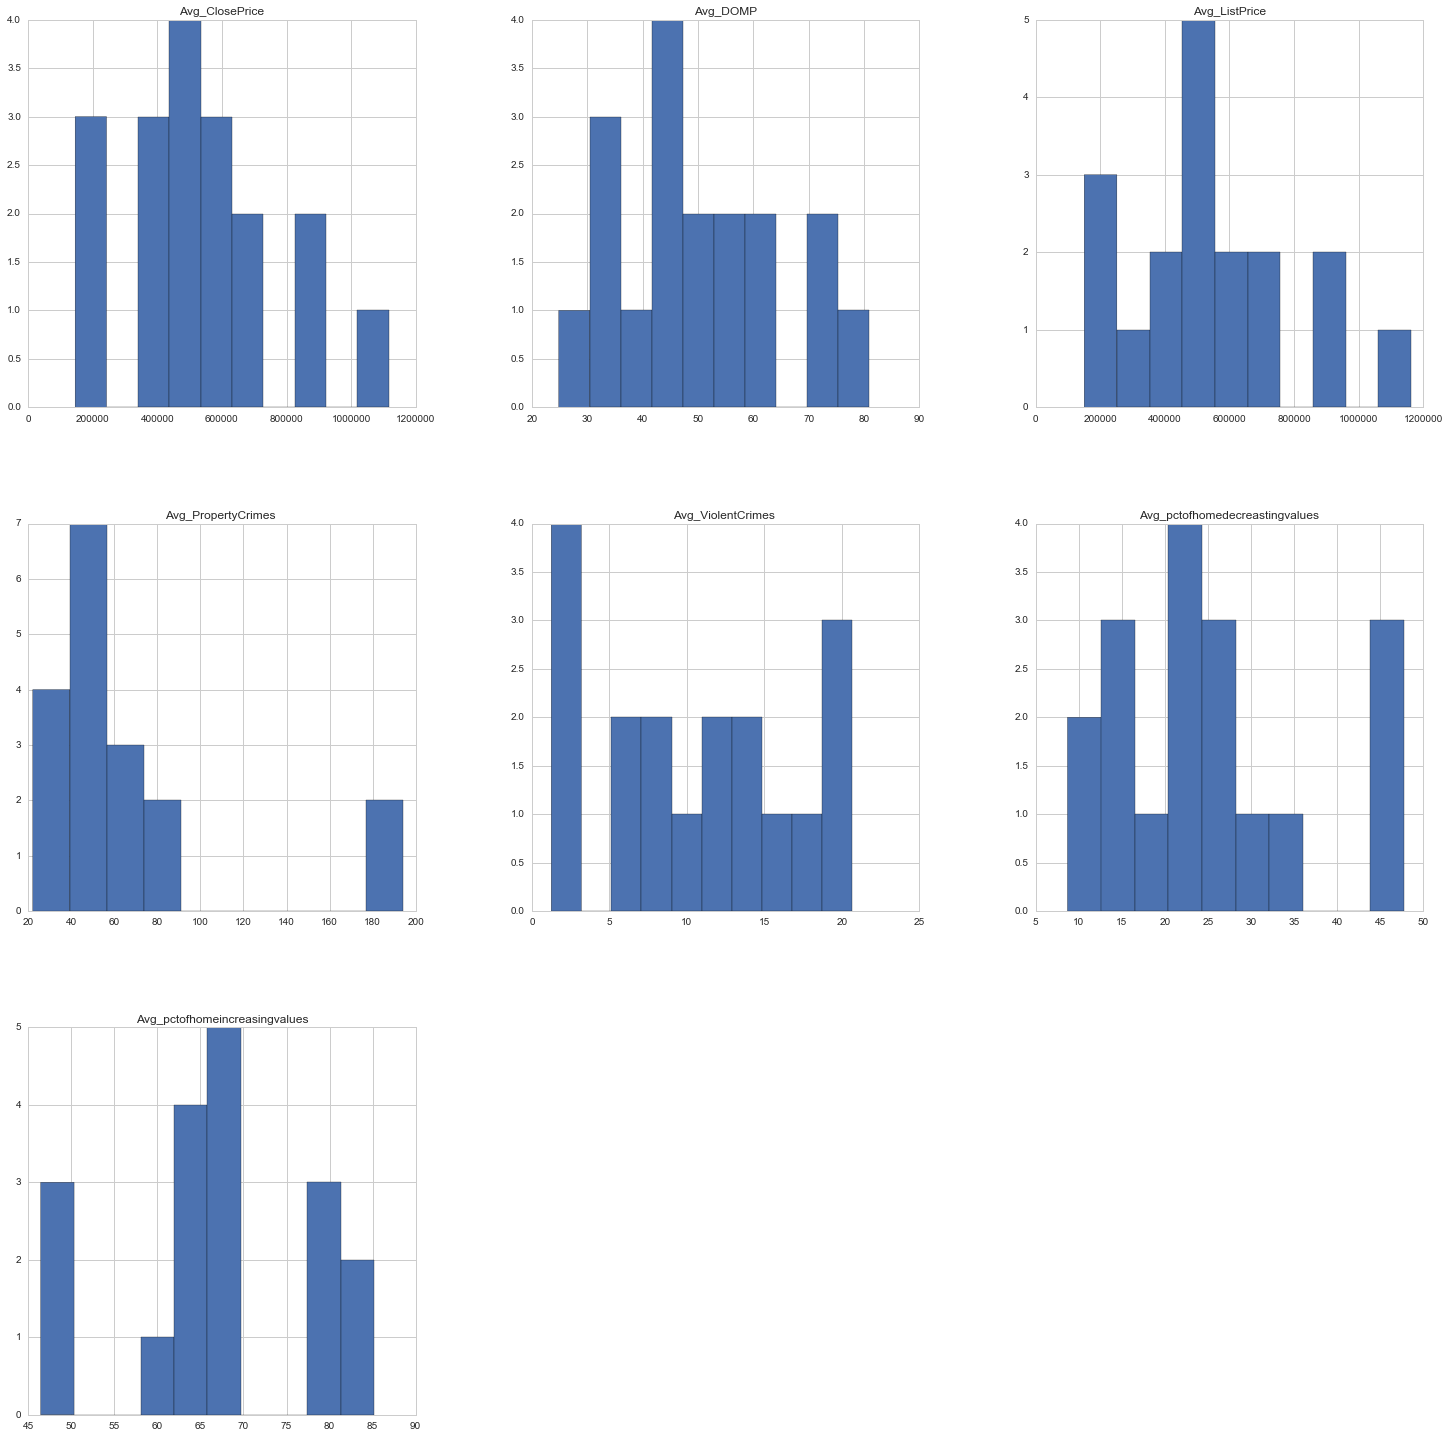

In [19]:
# Average value per zip code
df_Avg_zip=pd.DataFrame()
df_Avg_zip['Avg_DOMP']=(df_5.groupby(['Zip'])['DOMP'].mean())
df_Avg_zip['Avg_ListPrice']=(df_5.groupby(['Zip'])['ListPrice2'].mean())
df_Avg_zip['Avg_ClosePrice']=(df_5.groupby(['Zip'])['ClosePrice2'].mean())

df_Avg_zip['Avg_pctofhomedecreastingvalues']=(df_5.groupby(['Zip'])['PctOfHomesDecreasingInValues'].mean())
df_Avg_zip['Avg_pctofhomeincreasingvalues']=(df_5.groupby(['Zip'])['PctOfHomesIncreasingInValues'].mean())
df_Avg_zip['Avg_PropertyCrimes ']=(df_5.groupby(['Zip'])['PropertyCrimes'].mean())
df_Avg_zip['Avg_ViolentCrimes ']=(df_5.groupby(['Zip'])['ViolentCrimes'].mean())

df_Avg_zip.hist(figsize=(25,25))



In [20]:
df_Avg_zip

,Avg_DOMP,Avg_ListPrice,Avg_ClosePrice,Avg_pctofhomedecreastingvalues,Avg_pctofhomeincreasingvalues,Avg_PropertyCrimes,Avg_ViolentCrimes
Zip,,,,,,,
20001,31.815789,502152,503684,14.416063,78.729000,76.880000,14.700000
20002,44.708333,347714,350085,10.014125,85.164250,68.033333,15.195833
20004,39.361702,510944,504257,8.690213,84.012128,189.000000,12.000000
20005,24.845588,582513,580915,13.088750,79.383015,87.808824,6.917647
20007,63.844221,1162186,1116905,24.802707,62.727619,39.408291,2.792776
20008,51.581081,950998,921888,23.701171,63.327225,22.144144,1.913153
20009,34.707198,576140,576422,13.946618,77.632593,55.075472,8.691754
20010,34.924506,535026,539123,24.008641,67.814088,57.758420,13.069919
20011,55.128650,460699,456234,32.607217,60.806104,30.339416,9.693248


In [21]:
#Correlation of Average values per zipcode
df_Avg_Zip_CorrelationMatrix = pd.DataFrame(df_Avg_zip.corr())
df_Avg_Zip_CorrelationMatrix
#df_Avg_Zip_CorrelationMatrix.to_csv('Avg_Zip_Correlation_Matrix.csv')

,Avg_DOMP,Avg_ListPrice,Avg_ClosePrice,Avg_pctofhomedecreastingvalues,Avg_pctofhomeincreasingvalues,Avg_PropertyCrimes,Avg_ViolentCrimes
Avg_DOMP,1.000000,-0.252851,-0.278286,0.850771,-0.860538,-0.388182,0.292287
Avg_ListPrice,-0.252851,1.000000,0.999526,-0.471886,0.280621,-0.165514,-0.864408
Avg_ClosePrice,-0.278286,0.999526,1.000000,-0.490518,0.300997,-0.158541,-0.866116
Avg_pctofhomedecreastingvalues,0.850771,-0.471886,-0.490518,1.000000,-0.969472,-0.395865,0.455764
Avg_pctofhomeincreasingvalues,-0.860538,0.280621,0.300997,-0.969472,1.000000,0.433711,-0.292815
Avg_PropertyCrimes,-0.388182,-0.165514,-0.158541,-0.395865,0.433711,1.000000,0.376754
Avg_ViolentCrimes,0.292287,-0.864408,-0.866116,0.455764,-0.292815,0.376754,1.000000


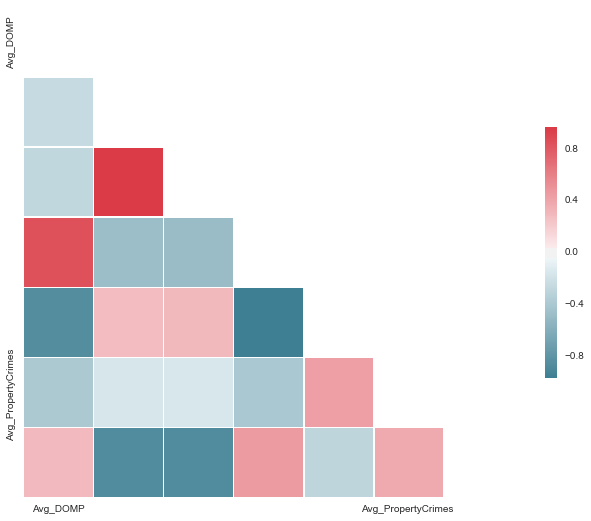

In [22]:
#Create Correlation Matrix plot 

# Generate a mask for the upper triangle
mask = np.zeros_like(df_Avg_Zip_CorrelationMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_Avg_Zip_CorrelationMatrix, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


In [ ]:
#Box plot of DOMP per zip code

g = sns.FacetGrid(df_4, col='Zip', size=20, aspect=.2)
g = g.map(sns.boxplot, 'DOMP', 'ClosePrice2')
sns.plt.show()

### Analysis/Modelling continued in Modelling script